In [101]:
import quandl
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib import pylab
import plotly.plotly as py
import plotly.graph_objs as go

In [102]:
data = quandl.get("BCHARTS/BITSTAMPUSD", returns = "numpy", start_date = "2013-01-01", end_date = "2017-09-26")

In [103]:
d = pd.DataFrame(data)
d

,Date,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
0,2013-01-01,13.24,13.24,12.77,13.22,2116.929409,2.753643e+04,13.007723
1,2013-01-02,13.12,13.19,12.98,13.09,1840.848724,2.411405e+04,13.099419
2,2013-01-03,13.09,13.26,12.96,13.19,3320.972054,4.360927e+04,13.131477
3,2013-01-04,13.12,13.24,12.84,13.19,2700.253507,3.536447e+04,13.096723
4,2013-01-05,13.19,13.19,13.03,13.15,1463.535849,1.922127e+04,13.133449
5,2013-01-06,13.11,13.15,13.06,13.15,453.563089,5.943520e+03,13.104064
6,2013-01-07,13.10,13.20,13.04,13.20,3935.248457,5.174181e+04,13.148295
7,2013-01-08,13.20,13.50,13.05,13.50,6086.275155,8.116631e+04,13.335958
8,2013-01-09,13.51,13.65,13.18,13.58,4640.267393,6.225810e+04,13.416921
9,2013-01-10,13.67,14.19,13.50,14.00,3719.447379,5.132312e+04,13.798587


In [104]:
close = np.diff(np.log(d['Close']))
n = len(close)

C:\Program Files\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log



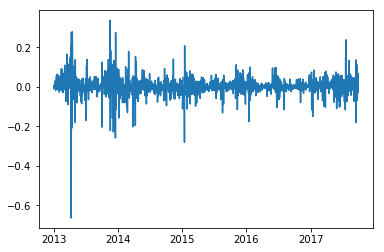

In [107]:
plt.plot(d.iloc[1:len(d), 0], close)
plt.show()

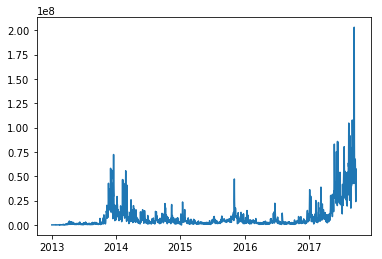

In [108]:
volume_currency = d['Volume (Currency)']
plt.plot(d.iloc[0:len(d), 0], volume_currency)
plt.show()

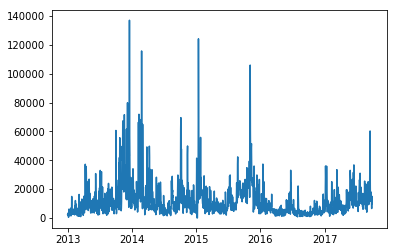

In [109]:
volume_btc = d['Volume (BTC)']
plt.plot(d.iloc[0:len(d), 0], volume_btc)
plt.show()

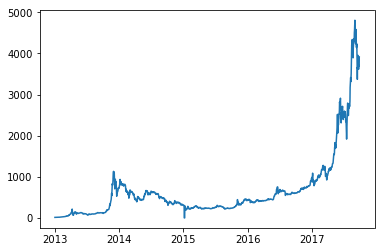

In [110]:
price = (d['Weighted Price'])
plt.plot(d.iloc[0:len(d), 0], price)
plt.show()

In [97]:
x = np.linspace(0,1729,num=1729)
y = price.iloc[1:].values
plt.plot(x, y, 'ro', label='data')

In [98]:
def exponential_func(x, a, b, c):
    return a*np.exp(-b*x)+c

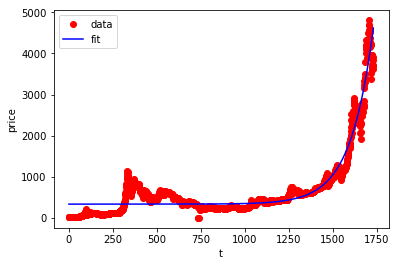

In [99]:
popt, pcov = curve_fit(exponential_func, x, y, p0 = [0,0,0])
plt.plot(x, exponential_func(x, *popt), 'b-', label='fit')
plt.xlabel('t')
plt.ylabel('price')
plt.legend()
plt.show()

In [100]:
pcov

array([[  1.33568415e-06,   1.30800063e-07,  -3.24675531e-03],
       [  1.30800063e-07,   1.28271243e-08,  -3.08638588e-04],
       [ -3.24675531e-03,  -3.08638588e-04,   4.26022504e+01]])